# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
data = pd.read_csv('../datasets/dataTrain_carListings.zip')

In [4]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [5]:
data.shape

(500000, 6)

In [6]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

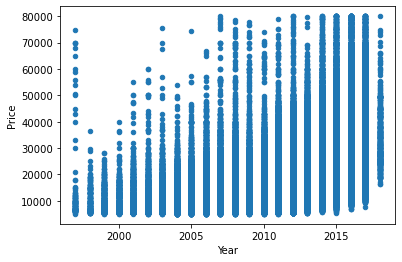

In [7]:
data.plot(kind='scatter', y='Price', x='Year')

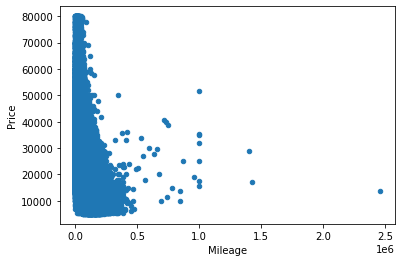

In [8]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [9]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [136]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

In [140]:
def cross_val_score(estimator, X, y, folds=10, scorer=r2_score):
    kf = KFold(n_splits=folds, shuffle=True, random_state=0)
    scores = []
    for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        scores.append(scorer(y_test, y_pred))
    return np.mean(scores)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
reg = RandomForestRegressor(n_jobs=-1)

In [69]:
X = data.iloc[:,1:]
y = data[["Price"]]

In [26]:
reg.fit(pd.get_dummies(X), y)

<ipython-input-26-3e0020a9973b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(pd.get_dummies(X), y)


RandomForestRegressor(n_jobs=-1)

In [29]:
cross_val_score(reg, pd.get_dummies(X).values, y.values)

TRAIN: [     1      2      3 ... 499997 499998 499999] TEST: [     0     27     58 ... 499983 499985 499995]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [     7     15     34 ... 499939 499954 499993]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      2      3 ... 499996 499997 499999] TEST: [     1     12     25 ... 499975 499986 499998]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [    11     20     22 ... 499978 499979 499994]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [     5     14     26 ... 499969 499977 499980]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499996 499997 499998] TEST: [     6     19     21 ... 499987 499988 499999]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [    10     13     32 ... 499990 499991 499992]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [     8     23     31 ... 499968 499971 499976]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      3 ... 499995 499998 499999] TEST: [     2      4     18 ... 499948 499996 499997]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [     3      9     16 ... 499958 499963 499966]


<ipython-input-12-ab77420c5f3f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


0.44425739935695974

In [63]:
import category_encoders as ce

In [161]:
X. dtypes

Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [100]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [117]:
y_train = y_train.reset_index(drop=True)['Price']
y_test = y_test.reset_index(drop=True)['Price']

### lightgbm

In [118]:
from lightgbm import LGBMRegressor

In [126]:
pipeline = Pipeline([
    ('encoder', ce.BinaryEncoder()),
    ('reg', LGBMRegressor(n_jobs=10))
])

In [127]:
param_grid = {
    "reg__num_leaves": [20, 31, 50, 100],
    "reg__max_depth": [-1, 3, 6, 15, 20, 25],
    "reg__learning_rate": [0.05, 0.1, 0.2, 0.3, 0.6],
    "reg__n_estimators": [50, 100, 1000, 1500],
    "reg__subsample_for_bin": [100000, 200000, 250000, 300000],
    "reg__min_split_gain": [0.0, 0.3, 0.4, 0.1, 0.5, 0.7, 0.9],
    "reg__min_child_samples": [10, 20, 30, 50],
    "reg__subsample": [0.7, 0.8, 0.9, 1],
    "reg__reg_alpha": [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    "reg__reg_lambda": [0.0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
}

In [128]:
search = HalvingRandomSearchCV(pipeline,
                               param_grid,
                               n_candidates='exhaust',
                               factor=4,
                               scoring='neg_mean_absolute_error',
                               n_jobs=1,
                               random_state=0).fit(X_train, y_train)

In [129]:
import pickle

In [130]:
with open("LGBMRegressor2.pkl", "wb") as model:
    pickle.dump(search.best_estimator_, model)

In [131]:
search.best_params_

{'reg__subsample_for_bin': 100000,
 'reg__subsample': 0.9,
 'reg__reg_lambda': 0.3,
 'reg__reg_alpha': 0.05,
 'reg__num_leaves': 50,
 'reg__n_estimators': 100,
 'reg__min_split_gain': 0.7,
 'reg__min_child_samples': 20,
 'reg__max_depth': 25,
 'reg__learning_rate': 0.2}

In [141]:
cross_val_score(search.best_estimator_, X_train, y_train)

TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [    47     56     57 ... 399971 399976 399982]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [    14     32     37 ... 399937 399942 399946]
TRAIN: [     0      1      2 ... 399996 399998 399999] TEST: [     5     11     12 ... 399979 399991 399997]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [     6      8     24 ... 399963 399969 399983]
TRAIN: [     0      1      3 ... 399997 399998 399999] TEST: [     2     10     13 ... 399978 399985 399996]
TRAIN: [     1      2      3 ... 399996 399997 399998] TEST: [     0      7     16 ... 399974 399977 399999]
TRAIN: [     0      1      2 ... 399997 399998 399999] TEST: [    15     26     34 ... 399980 399993 399994]
TRAIN: [     0      1      2 ... 399996 399997 399999] TEST: [     3      9     33 ... 399990 399992 399998]
TRAIN: [     0      2      3 ... 399997 399998 399999] TEST: [     1      4     22 ... 399987 399989 399995]
TRAIN: [     0     

0.8676456054596458

In [142]:
r2_score(search.best_estimator_.predict(X_test), y_test)

0.8342661511769282

In [143]:
# train with all data

In [189]:
model = search.best_estimator_

In [190]:
X.loc[:,"State"] = X["State"].str.upper()
X.loc[:,"Make"] = X["Make"].str.upper()
X.loc[:,"Model"] = X["Model"].str.upper()

In [196]:
X

,Year,Mileage,State,Make,Model
0,2014,31909,MD,NISSAN,MURANOAWD
1,2016,25741,KY,CHEVROLET,CAMAROCOUPE
2,2016,24633,SC,HYUNDAI,SANTA
3,2012,84026,OK,JEEP,GRAND
4,2013,22816,TN,JEEP,WRANGLER
...,...,...,...,...,...
499995,2013,40393,TX,BMW,1
499996,2012,91794,WA,HYUNDAI,SANTA
499997,2014,39107,MS,FORD,SUPER
499998,2010,62556,NH,DODGE,RAM


In [197]:
model.fit(X, y)

Pipeline(steps=[('encoder', BinaryEncoder()),
                ('reg',
                 LGBMRegressor(learning_rate=0.2, max_depth=25,
                               min_split_gain=0.7, n_jobs=10, num_leaves=50,
                               reg_alpha=0.05, reg_lambda=0.3, subsample=0.9,
                               subsample_for_bin=100000))])

In [203]:
import lightgbm

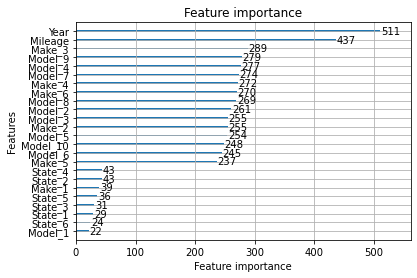

In [208]:
lightgbm.plot_importance(model._final_estimator)

In [198]:
with open("LGBMRegressor3.pkl", "wb") as model2:
    pickle.dump(model, model2)

In [199]:
cross_val_score(search.best_estimator_, X, y)

TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [     5     12     29 ... 499978 499987 499994]
TRAIN: [     0      1      2 ... 499996 499997 499998] TEST: [    13     14     32 ... 499966 499988 499999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [    35     36     47 ... 499960 499969 499972]
TRAIN: [     0      1      3 ... 499997 499998 499999] TEST: [     2     11     17 ... 499956 499992 499993]
TRAIN: [     0      1      2 ... 499996 499998 499999] TEST: [     6      8     24 ... 499973 499991 499997]
TRAIN: [     1      2      3 ... 499997 499998 499999] TEST: [     0     10     20 ... 499948 499953 499981]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [     7     15     16 ... 499975 499982 499990]
TRAIN: [     0      1      2 ... 499995 499997 499999] TEST: [     3      9     33 ... 499989 499996 499998]
TRAIN: [     0      2      3 ... 499997 499998 499999] TEST: [     1      4     22 ... 499983 499985 499995]
TRAIN: [     0     

0.867722760650923

In [195]:
"str".upper()

'STR'

In [172]:
year = int(2014)
mileage = int(150000)
state = "NY"
make = "Hyundai"
model = "Santa"

In [173]:
np.array([year, mileage, state, make, model]).reshape(-1, 5)

array([['2014', '150000', 'NY', 'Hyundai', 'Santa']], dtype='<U11')

In [179]:
cost = pd.DataFrame(np.array([year, mileage, state, make, model]).reshape(-1, 5), columns=["Year", "Mileage", "State", "Make", "Model"])
cost.loc[:,"Year"] = cost["Year"].astype("float").astype("int64")
cost.loc[:,"Mileage"] = cost["Mileage"].astype("float").astype("int64")

In [180]:
cost

,Year,Mileage,State,Make,Model
0,2014,150000,NY,Hyundai,Santa


In [181]:
cost.dtypes

Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [182]:
X.dtypes

Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [183]:
search.best_estimator_.predict(cost)

array([11239.65303363])

### xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
pipeline2 = Pipeline([
    ('encoder', ce.BinaryEncoder()),
    ('reg', XGBRegressor(n_jobs=10))
])

In [ ]:
param_grid = {
    "reg__gamma": [0.36, 0.12, 0.95, 5.68, 43.19],
    "reg__max_depth": [-1, 3, 6, 15, 20, 25],
    "reg__learning_rate": [0.05, 0.1, 0.2, 0.3, 0.6],
    "reg__n_estimators": [50, 100, 1000, 1500],
    "reg__colsample_bytree": [0.7, 0.8, 0.9, 1],
    "reg__colsample_bytree": [0.7, 0.8, 0.9, 1],
    "reg__colsample_bynode": [0.7, 0.8, 0.9, 1],
    "reg__subsample": [0.7, 0.8, 0.9, 1],
    "reg__reg_alpha": [0.0, 0.05, 0.1, 0.3, 0.5, 1],
    "reg__reg_lambda": [0.0, 0.03, 0.05, 0.1, 0.3, 1],
}

In [ ]:
search2 = HalvingRandomSearchCV(pipeline2,
                               param_grid,
                               n_candidates='exhaust',
                               factor=4,
                               scoring='neg_mean_absolute_error',
                               n_jobs=1,
                               random_state=0).fit(X_train, y_train)

In [ ]:
with open("XGBRegressor.pkl", "wb") as model:
    pickle.dump(search2.best_estimator_, model)

In [ ]:
search2.best_params_

In [ ]:
cross_val_score(search2.best_estimator_, X_train, y_train)

In [151]:
pd.__version_

AttributeError: module 'pandas' has no attribute '__version_'

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
